In [8]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')
# Import libraries
import pandas
import joblib
import csv
import sklearn.model_selection
import sklearn.tree
import sklearn.ensemble
import sklearn.metrics
import xgboost
import graphviz
from graphviz import Source
import matplotlib.pyplot as plt
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier



In [9]:
df= pd.read_csv("titanic-passengers.csv",sep=";")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,NaN,S


In [12]:
del df['Cabin']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,C
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,S


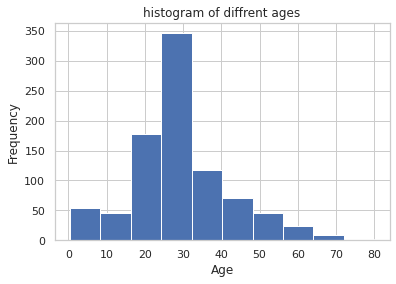

In [13]:
import matplotlib.pyplot as plt

plt.title("histogram of diffrent ages")
plt.xlabel("Age")
df["Age"].plot.hist()

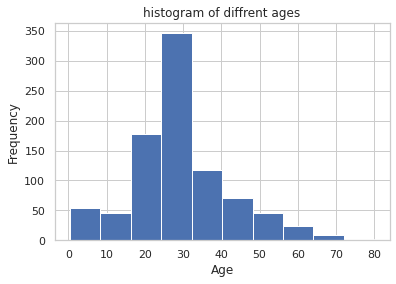

In [14]:
import matplotlib.pyplot as plt

plt.title("histogram of diffrent ages")
plt.xlabel("Age")
df["Age"].plot.hist()




the ages between 15 and 40 are the most frequently in our data




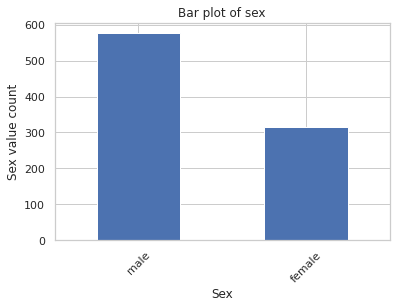

In [15]:

plt.title("Bar plot of sex")
plt.xlabel("Sex")
plt.ylabel("Sex value count")
vc=df['Sex'].value_counts()
vc.plot.bar(rot=45)

the number of male sex is greater then female sex

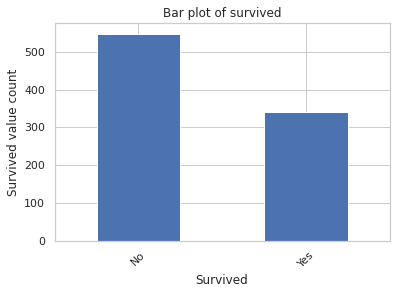

In [16]:
plt.title("Bar plot of survived")
plt.xlabel("Survived")
plt.ylabel("Survived value count")
vc=df['Survived'].value_counts()
vc.plot.bar(rot=45)

the number of unsurvived is greater then number of survived

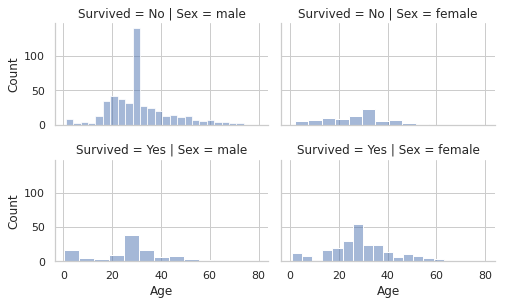

In [17]:
import seaborn as sns
grid = sns.FacetGrid(df, row="Survived", col="Sex", size=2.2, aspect=1.6)
grid.map(sns.histplot, 'Age', alpha=.5)
grid.add_legend()

between ages 0 and 40 years old,a lot of male have died compared with the other intervalle
the wowzn have lived better then men

In [18]:
import seaborn as sns
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    

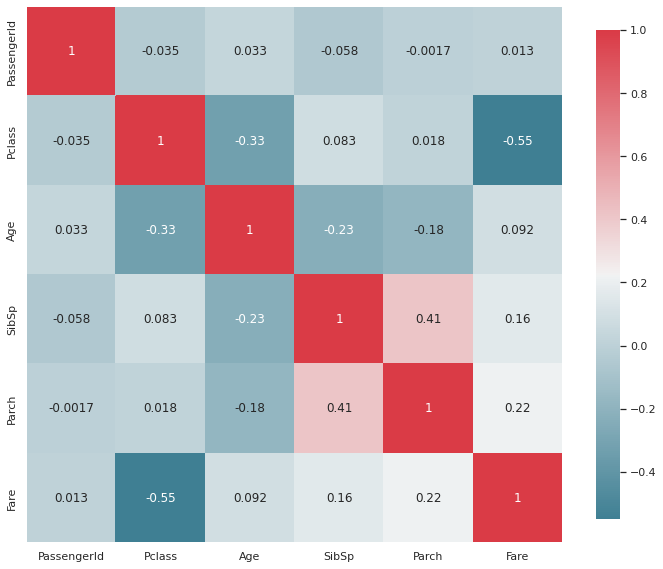

In [19]:
plot_correlation_map(df)

In [20]:
cleanup={"Survived":{"Yes":1, "No": 0}}  
df=df.replace(cleanup)
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [21]:

df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,C
888,535,0,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,S


In [22]:
 import pandas as pd
 import re
 list1=[]
 for name in df['Name'] :
  found = re.search(', (.+?). ', name).group(1)
  list1.append(found)
df['title']=list1
df
  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,S,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,S,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,S,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,Mrs
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,C,Mr
888,535,0,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,S,Miss
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,S,Mr


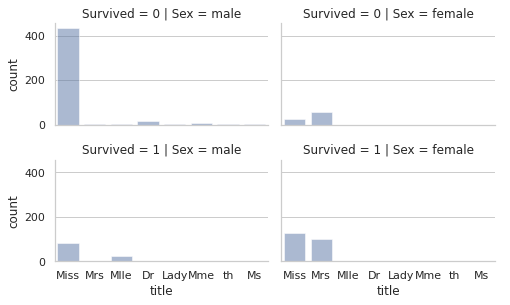

In [23]:
import seaborn as sns
grid = sns.FacetGrid(df, row="Survived", col="Sex", size=2.2, aspect=1.6)
grid.map(sns.countplot, 'title', alpha=.5)
grid.add_legend()

In [24]:
Titled = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

             "Dr":         "Officer",

            "Rev":        "Officer" ,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty" ,

                  "the Countess":  "Royalty",

                    "Dona":       "Royalty" ,

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs" ,

                    "Master" :    "Master",

                    }
                     


In [25]:
df=df.replace({"title" : Titled})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,S,Mrs
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,S,Mrs
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,S,Mrs
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,Mrs
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,C,Mrs
888,535,0,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,S,Miss
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,S,Mrs


In [26]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'title'],
      dtype='object')

In [27]:
df['FamilySize']=df['Parch']+df['SibSp']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,S,Mrs,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,S,Mrs,0
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,S,Mrs,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,S,Mrs,4
4,672,0,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,S,Mrs,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,Mrs,1
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,C,Mrs,0
888,535,0,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,S,Miss,0
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,S,Mrs,0


In [28]:
df.dropna(axis=0, how='any', thresh=None, subset=["Embarked"], inplace=True)

In [29]:
cleanup={"Embarked":{"S":1, "C": 0, "Q":3}}  
df=df.replace(cleanup)
cleanup1={"Sex":{"male":1, "female": 0}}  
df=df.replace(cleanup1)
cleanup2={"title":{"Mrs":1, "Miss": 0}}  
df=df.replace(cleanup2)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,1,1,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,1,1,0
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,1,1,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,1,1,4
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,0,1,1
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,0,1,0
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,1,0,0
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,1,1,0


In [30]:
from sklearn.linear_model import LogisticRegression

cols = ["Age","Fare","Pclass","Embarked","Sex"] 
X = df[cols]
y = df['Survived']
model = LogisticRegression()


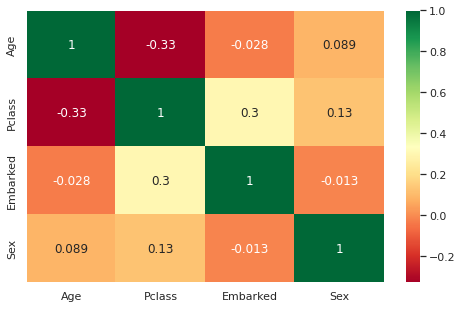

In [31]:
Selected_features = ['Age', 'Pclass', 
                     'Embarked', 'Sex']
X = df[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = df[Selected_features]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,1,1,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,1,1,0
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,1,1,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,1,1,4
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,0,1,1
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,0,1,0
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,1,0,0
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,1,1,0


In [34]:
set(df["Embarked"])

{0, 1, 3}

Train/Test split results:
LogisticRegression accuracy is 0.787
LogisticRegression log_loss is 0.482
LogisticRegression auc is 0.843


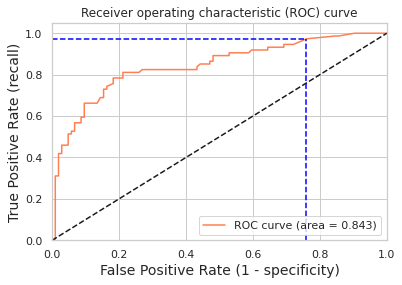

Using a threshold of 0.091 guarantees a sensitivity of 0.973 and a specificity of 0.240, i.e. a false positive rate of 75.96%.


In [35]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [36]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.790 (+/-0.047)
LogisticRegression average log_loss: 0.459 (+/-0.061)
LogisticRegression average auc: 0.844 (+/-0.042)


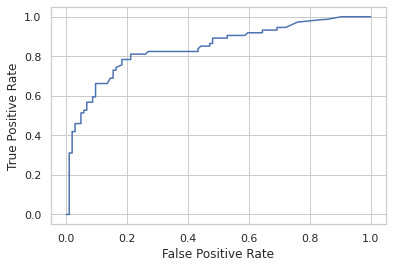

In [37]:
from sklearn import metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

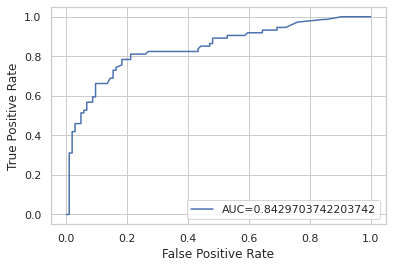

In [38]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

|--- feature_3 <= 0.50
|   |--- feature_1 <= 2.50
|   |   |--- feature_0 <= 23.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  23.50
|   |   |   |--- feature_0 <= 26.50
|   |   |   |   |--- feature_0 <= 24.50
|   |   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  24.50
|   |   |   |   |   |--- feature_0 <= 25.50
|   |   |   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  25.50
|   |   |   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  26.50
|   |   |   |   |--- feature_0 <= 43.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature

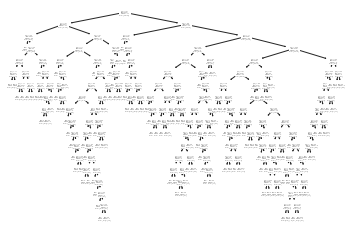

In [39]:
from sklearn import tree

model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

graph = Source( tree.export_graphviz(model, out_file=None,filled=True, 
                                rounded=True,  
                                special_characters=True, feature_names=X.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)
print(tree.export_text(model))
tree.plot_tree(model)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)  
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

In [40]:
param_dist ={
 "criterion" : ["gini","entropy"],
 "max_depth" : [1,2,3,4,5,6,7,None]
}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid=param_dist, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_estimator_
grid.best_score_
grid.best_params_
y_pred_test11 = grid.predict(X_test)
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test11))


Accuracy score for test data is: 0.7752808988764045


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)
y_pred_test1 = grid_search.predict(X_test)
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test1))
confusion_matrix =pd.crosstab(y_test, y_pred_test1)

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

Accuracy score for test data is: 0.7752808988764045
                 Predicted Died  Predicted Survived
Actual Died                  95                   9
Actual Survived              31                  43


   Accuracy: 0.7808988764044944
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       104
           1       0.74      0.73      0.73        74

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



NameError: ignored

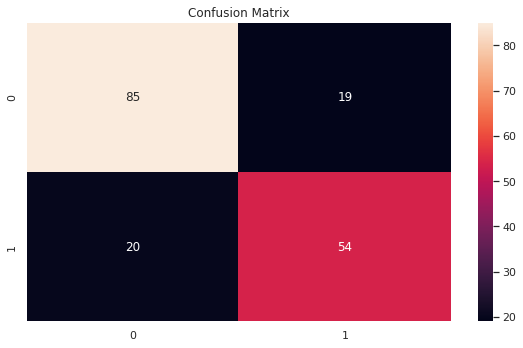

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
clf = RandomForestClassifier(n_estimators=100)


#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

print(classification_report(y_test,y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()
scaled_test = pd.DataFrame(scaled_test, columns=test_data.columns, index=test_data.index)

new_test = scaled_test.drop(['Alone','Parch','Embarked'], axis=1)

prediction = clf.predict(new_test)

df['Survival_Predictions'] = pd.Series(prediction)
df.head()